In [1]:
import pandas as pd
from sqlalchemy import create_engine
import yaml
config = yaml.safe_load(open('dart_config.yml'))

In [2]:
db_url = 'mysql://' + config['DB_USER'] + ':' + config['DB_USER_PASSWORD'] + '@' + config['DB_HOST'] \
                            + '/' + config['DB_NAME'] + '?charset=utf8'
engine = create_engine(db_url, encoding='utf-8')
conn = engine.connect()

In [3]:
company_df = pd.read_sql_table(config['DB_TABLE_NAME_1'], con=conn, index_col='id', 
                          columns=['id', 'name', '업종'])
company_df.head()

,name,업종
id,,
1,롯데케미칼,기초 화학물질 제조업
2,대한유화,기초 화학물질 제조업
3,이화산업,기타 전문 도매업
4,디케이앤디,플라스틱제품 제조업
5,송원산업,기타 화학제품 제조업


In [11]:
len(company_df.업종.drop_duplicates().reset_index(drop=True))

102

In [18]:
company_df.groupby('업종').agg({'name': 'count'}).sort_values('name', ascending=False).head()

,name
업종,
자동차 신품 부품 제조업,98
전자부품 제조업,79
특수 목적용 기계 제조업,69
의약품 제조업,56
기타 화학제품 제조업,53


In [54]:
automotive_company_df = company_df.loc[company_df.업종 == '자동차 신품 부품 제조업']
automotive_company_df.head()

,name,업종
id,,
2215,현대공업,자동차 신품 부품 제조업
2219,금호에이치티,자동차 신품 부품 제조업
2221,코다코,자동차 신품 부품 제조업
2222,태양금속공업,자동차 신품 부품 제조업
2223,인지컨트롤스,자동차 신품 부품 제조업


In [55]:
electronic_company_df = company_df.loc[company_df.업종 == '전자부품 제조업']
electronic_company_df.head()

,name,업종
id,,
6,일진머티리얼즈,전자부품 제조업
9,대주전자재료,전자부품 제조업
2159,일진머티리얼즈,전자부품 제조업
2162,대주전자재료,전자부품 제조업
2165,멜파스,전자부품 제조업


In [56]:
chemistry_company_df = company_df.loc[company_df.업종 == '기타 화학제품 제조업']
chemistry_company_df.head()

,name,업종
id,,
5,송원산업,기타 화학제품 제조업
7,미원상사,기타 화학제품 제조업
2158,송원산업,기타 화학제품 제조업
2160,미원상사,기타 화학제품 제조업
2180,이엔에프테크놀로지,기타 화학제품 제조업


In [57]:
sample_company_df = pd.concat([automotive_company_df, electronic_company_df, chemistry_company_df])
len(sample_company_df)

230

In [58]:
sample_company_df.tail()

,name,업종
id,,
3071,네오팜,기타 화학제품 제조업
3073,비엔디생활건강,기타 화학제품 제조업
3116,메카로,기타 화학제품 제조업
3126,에이씨티,기타 화학제품 제조업
3148,나노신소재,기타 화학제품 제조업


In [36]:
bs_df = pd.read_sql_table(config['DB_TABLE_NAME_2'], con=conn, index_col='id', 
                          columns=['id', 'company_id', 'year', 'quarter', 'data_period', '매출액', '영업이익', '분기순이익'])
com_total_df = bs_df.groupby('company_id').agg({'매출액': 'count'}).rename(columns={'매출액':'total'})
com_index_list = com_total_df.index[com_total_df['total'] >= 30].tolist()
bs_df = bs_df.loc[bs_df['company_id'].isin(com_index_list)]
bs_df = bs_df.loc[~bs_df['company_id'].isin(bs_df.loc[bs_df['data_period'] != 'quarter']['company_id'].tolist())]
bs_df['date'] = bs_df['year'].apply(str) + '-' + 'Q' + bs_df['quarter'].apply(str)
bs_df['date'] = pd.to_datetime(bs_df['date'])
bs_df = bs_df[['company_id', 'date', '매출액', '영업이익', '분기순이익']]
bs_df= bs_df.loc[~bs_df.company_id.isin([2174, 2188, 2260, 2261, 2325, 2327])]
bs_df.head()

,company_id,date,매출액,영업이익,분기순이익
id,,,,,
1,1,2012-01-01,385.037,21.96120,18.17950
2,1,2012-04-01,394.880,-2.83395,-1.41608
3,1,2012-07-01,413.187,20.22220,15.73590
4,1,2012-10-01,350.719,-23.49350,-15.59320
5,1,2013-01-01,417.124,11.74340,11.36530


In [59]:
df = pd.merge(sample_company_df, bs_df, left_index=True, right_on='company_id').reset_index(drop=True)
df.head()

,name,업종,company_id,date,매출액,영업이익,분기순이익
0,코다코,자동차 신품 부품 제조업,2221,2012-01-01,4.87039,0.273967,0.180559
1,코다코,자동차 신품 부품 제조업,2221,2012-04-01,5.52593,0.304578,0.046181
2,코다코,자동차 신품 부품 제조업,2221,2012-07-01,4.65819,0.145097,-0.066403
3,코다코,자동차 신품 부품 제조업,2221,2012-10-01,6.38513,0.625129,0.542530
4,코다코,자동차 신품 부품 제조업,2221,2013-01-01,5.22853,0.337848,0.189982


In [60]:
print(len(df.loc[df.업종 == '자동차 신품 부품 제조업']))
df.loc[df.업종 == '자동차 신품 부품 제조업'].tail()

480


,name,업종,company_id,date,매출액,영업이익,분기순이익
475,덕양산업,자동차 신품 부품 제조업,2357,2018-04-01,31.5577,-0.181559,-0.216773
476,덕양산업,자동차 신품 부품 제조업,2357,2018-07-01,30.3061,-0.132704,-0.285308
477,덕양산업,자동차 신품 부품 제조업,2357,2018-10-01,38.3037,0.758888,0.632484
478,덕양산업,자동차 신품 부품 제조업,2357,2019-01-01,29.3209,-0.193388,-0.137124
479,덕양산업,자동차 신품 부품 제조업,2357,2019-04-01,33.7147,-0.400799,-0.495728


In [61]:
print(len(df.loc[df.업종 == '전자부품 제조업']) + 480)
df.loc[df.업종 == '전자부품 제조업'].tail()

1200


,name,업종,company_id,date,매출액,영업이익,분기순이익
1195,케이엔더블유,전자부품 제조업,2362,2018-04-01,3.11439,0.040701,0.028360
1196,케이엔더블유,전자부품 제조업,2362,2018-07-01,3.02583,-0.021982,-0.016753
1197,케이엔더블유,전자부품 제조업,2362,2018-10-01,3.13041,0.149148,0.110307
1198,케이엔더블유,전자부품 제조업,2362,2019-01-01,2.99893,-0.062749,-0.058547
1199,케이엔더블유,전자부품 제조업,2362,2019-04-01,2.49656,-0.002860,-0.029389


In [62]:
print(len(df.loc[df.업종 == '기타 화학제품 제조업']) + 1200)
df.loc[df.업종 == '기타 화학제품 제조업'].tail()

1440


,name,업종,company_id,date,매출액,영업이익,분기순이익
1435,솔브레인,기타 화학제품 제조업,2220,2018-04-01,23.8256,4.31966,2.41018
1436,솔브레인,기타 화학제품 제조업,2220,2018-07-01,25.4935,4.68391,3.43510
1437,솔브레인,기타 화학제품 제조업,2220,2018-10-01,19.8620,2.35547,-0.00960
1438,솔브레인,기타 화학제품 제조업,2220,2019-01-01,24.6848,4.30604,4.31073
1439,솔브레인,기타 화학제품 제조업,2220,2019-04-01,25.6691,4.58104,4.01354


In [63]:
pivot_df = df.pivot(index='date', columns='company_id', values='매출액')
pivot_df.head()

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,14.7376,9.0284,3.86494,2.52421,14.7376,9.0284,3.86494,2.52421,5.91983,17.4920,...,1.82611,3.81941,0.595731,11.3009,7.83580,11.0916,734.149,21.8337,2.06316,0.715197
2012-04-01,16.4405,9.6532,3.94281,2.18749,16.4405,9.6532,3.94281,2.18749,7.32945,17.1496,...,1.61953,4.48691,0.584765,11.8718,8.06924,11.4709,769.727,24.7847,2.35682,0.716462
2012-07-01,14.7593,9.4941,3.75811,1.93000,14.7593,9.4941,3.75811,1.93000,9.26218,13.9002,...,1.40281,3.12236,0.870800,11.8895,6.85294,13.9639,746.716,18.8321,2.04147,0.700690
2012-10-01,23.6858,10.8406,6.96337,4.72620,23.6858,10.8406,6.96337,4.72620,10.54060,28.9183,...,2.30694,23.60770,0.428270,52.6078,9.31208,12.3095,838.752,34.1354,4.56389,1.762870
2013-01-01,17.4344,9.2804,5.95595,1.88263,17.4344,9.2804,5.95595,1.88263,15.95480,15.8179,...,1.41598,10.12660,0.865916,24.9691,7.29486,11.5405,810.977,20.3815,2.44448,1.584570


In [70]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (40,15)

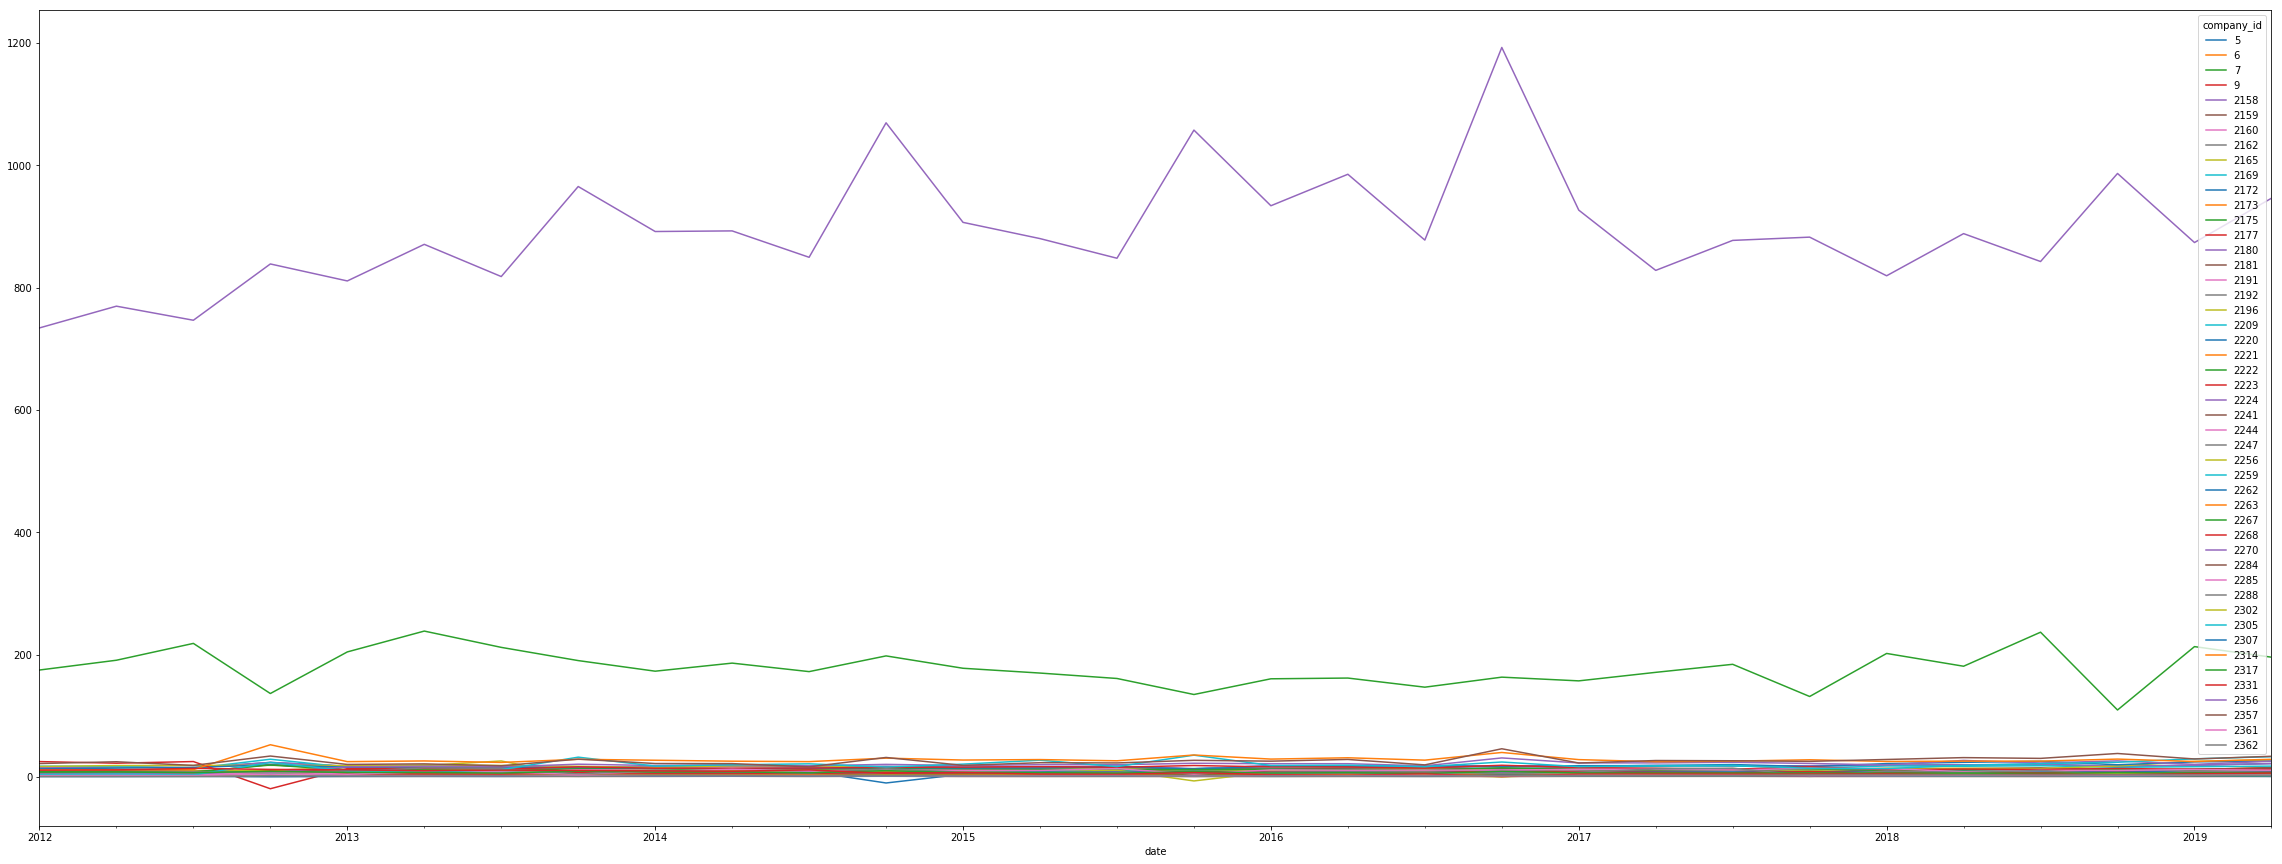

In [71]:
pivot_df.plot()

In [72]:
pivot_df.pct_change().fillna(0).head()

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-04-01,0.115548,0.069204,0.020148,-0.133396,0.115548,0.069204,0.020148,-0.133396,0.238118,-0.019575,...,-0.113126,0.174765,-0.018408,0.050518,0.029791,0.034197,0.048462,0.135158,0.142335,0.001769
2012-07-01,-0.102260,-0.016482,-0.046845,-0.117710,-0.102260,-0.016482,-0.046845,-0.117710,0.263694,-0.189474,...,-0.133817,-0.304118,0.489145,0.001491,-0.150733,0.217333,-0.029895,-0.240172,-0.133803,-0.022014
2012-10-01,0.604805,0.141825,0.852891,1.448808,0.604805,0.141825,0.852891,1.448808,0.138026,1.080423,...,0.644514,6.560851,-0.508188,3.424728,0.358845,-0.118477,0.123254,0.812618,1.235590,1.515906
2013-01-01,-0.263930,-0.143922,-0.144674,-0.601661,-0.263930,-0.143922,-0.144674,-0.601661,0.513652,-0.453014,...,-0.386209,-0.571047,1.021893,-0.525373,-0.216624,-0.062472,-0.033115,-0.402922,-0.464387,-0.101142


In [73]:
pivot_df = pivot_df.pct_change().fillna(0) * 100
pivot_df.head()

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-04-01,11.554799,6.920385,2.014779,-13.339619,11.554799,6.920385,2.014779,-13.339619,23.811832,-1.957466,...,-11.312572,17.476521,-1.840764,5.051810,2.979147,3.419705,4.846155,13.515804,14.233506,0.176874
2012-07-01,-10.225966,-1.648158,-4.684476,-11.771025,-10.225966,-1.648158,-4.684476,-11.771025,26.369373,-18.947381,...,-13.381660,-30.411798,48.914521,0.149093,-15.073291,21.733255,-2.989501,-24.017236,-13.380318,-2.201373
2012-10-01,60.480511,14.182492,85.289148,144.880829,60.480511,14.182492,85.289148,144.880829,13.802582,108.042330,...,64.451351,656.085141,-50.818787,342.472770,35.884453,-11.847693,12.325436,81.261782,123.559004,151.590575
2013-01-01,-26.393029,-14.392192,-14.467420,-60.166095,-26.393029,-14.392192,-14.467420,-60.166095,51.365197,-45.301418,...,-38.620857,-57.104673,102.189273,-52.537266,-21.662400,-6.247207,-3.311468,-40.292189,-46.438674,-10.114189


In [76]:
ret = (pivot_df - pivot_df.mean())
ret.head()

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,-2.398593,-3.470012,-3.463045,-4.568062,-2.398593,-3.470012,-3.463045,-4.568062,-24.009227,-2.544661,...,-127.762133,-30.387997,-7.983262,-11.387728,-1.988958,-22.491371,-1.635488,-7.703178,-4.130018,-8.869735
2012-04-01,9.156206,3.450373,-1.448266,-17.907682,9.156206,3.450373,-1.448266,-17.907682,-0.197395,-4.502127,...,-139.074705,-12.911476,-9.824025,-6.335918,0.990189,-19.071666,3.210668,5.812626,10.103488,-8.692861
2012-07-01,-12.624559,-5.118170,-8.147522,-16.339088,-12.624559,-5.118170,-8.147522,-16.339088,2.360146,-21.492041,...,-141.143793,-60.799795,40.931260,-11.238635,-17.062248,-0.758116,-4.624989,-31.720414,-17.510335,-11.071108
2012-10-01,58.081918,10.712480,81.826103,140.312767,58.081918,10.712480,81.826103,140.312767,-10.206645,105.497670,...,-63.310782,625.697144,-58.802049,331.085042,33.895495,-34.339064,10.689948,73.558604,119.428986,142.720840
2013-01-01,-28.791622,-17.862204,-17.930466,-64.734158,-28.791622,-17.862204,-17.930466,-64.734158,27.355970,-47.846079,...,-166.382990,-87.492670,94.206011,-63.924995,-23.651358,-28.738579,-4.946955,-47.995367,-50.568692,-18.983924


In [83]:
indus = pd.DataFrame([[1,0,0]] * 16 + \
                     [[0,1,0]] * 24 + \
                     [[0,0,1]] * 8, columns=["auto", "elec", "chem"], index=ret.columns).T
indus

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
auto,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
elec,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
chem,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


In [86]:
import statsmodels.api as sm

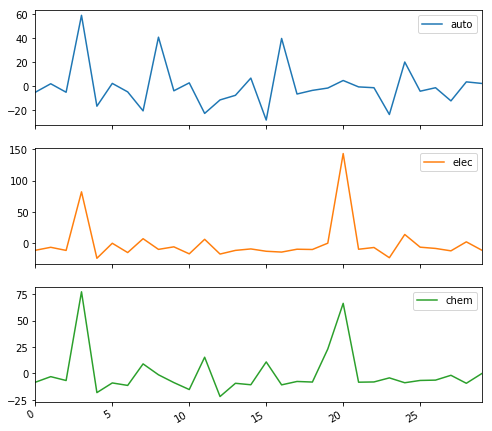

In [87]:
r_ols = sm.OLS(ret.T, indus.T).fit()
factor_ols = r_ols.params.T
factor_ols.plot(subplots=True, figsize=(8, 8))
plt.show()

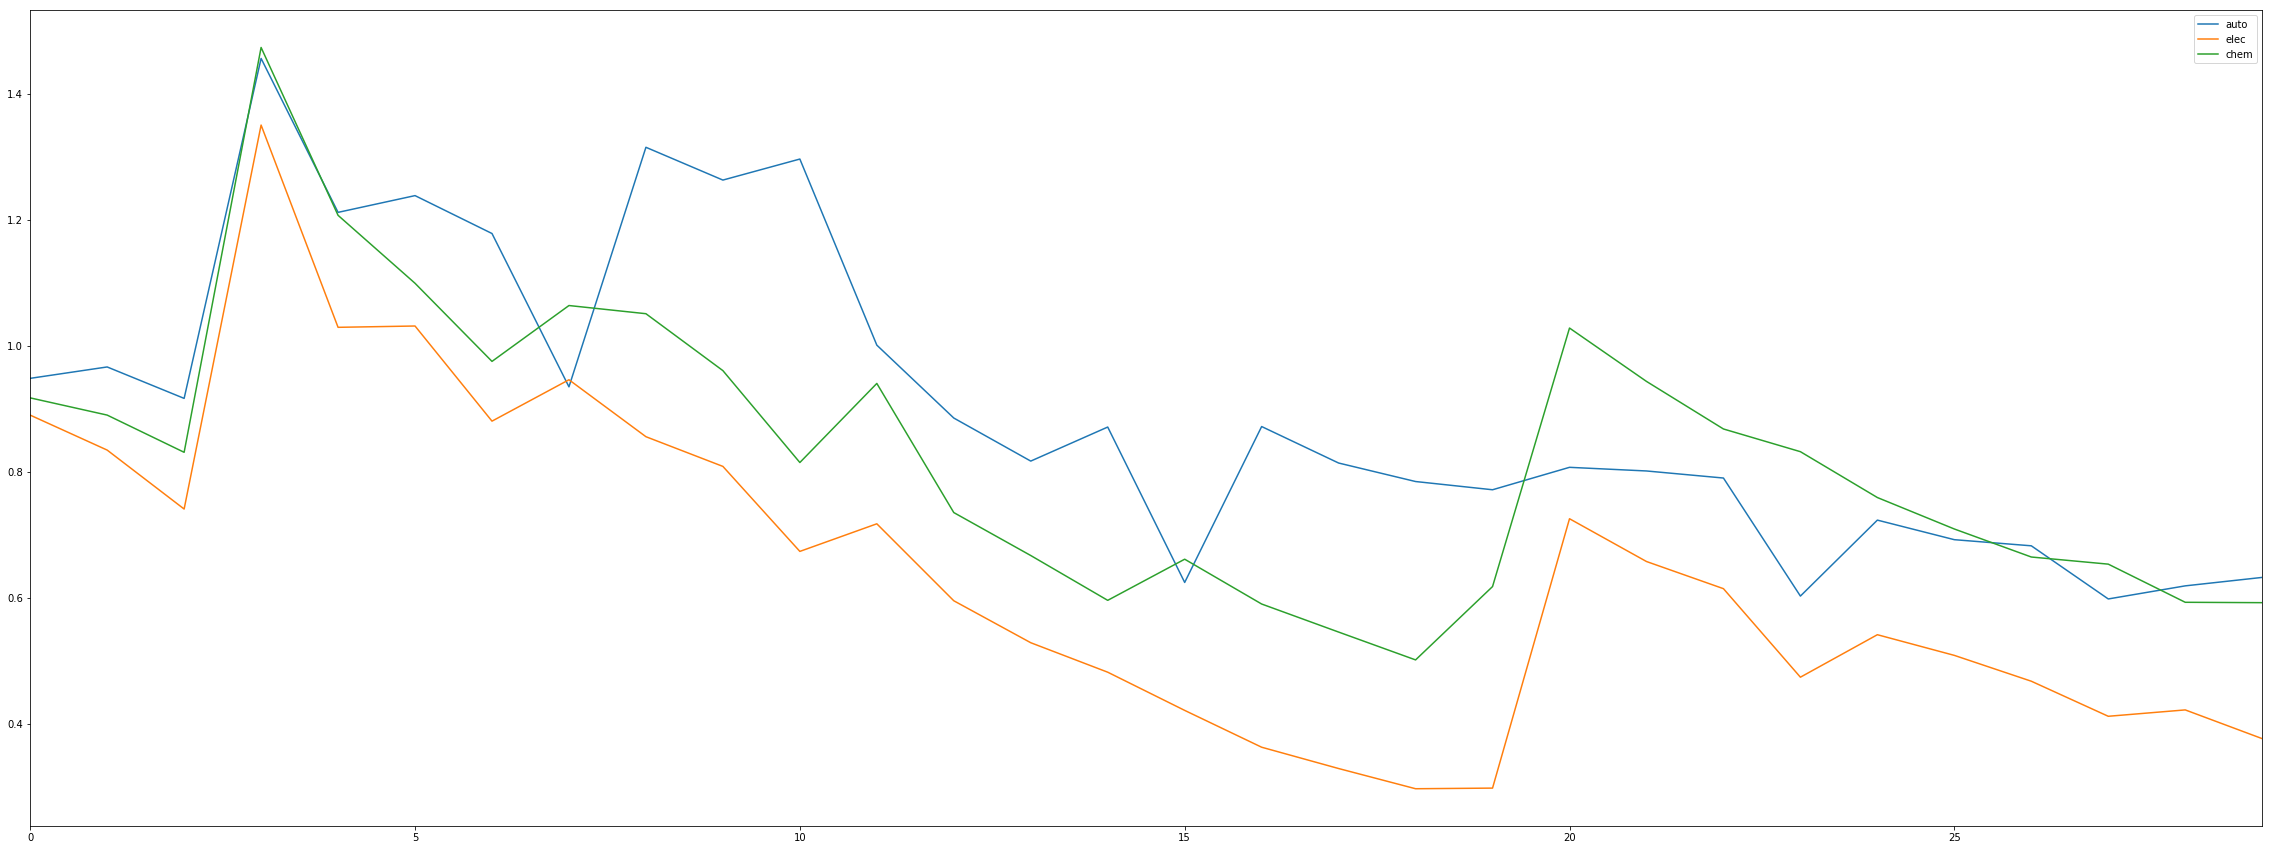

In [88]:
(1 + 0.01 * factor_ols).cumprod().plot()
plt.show()

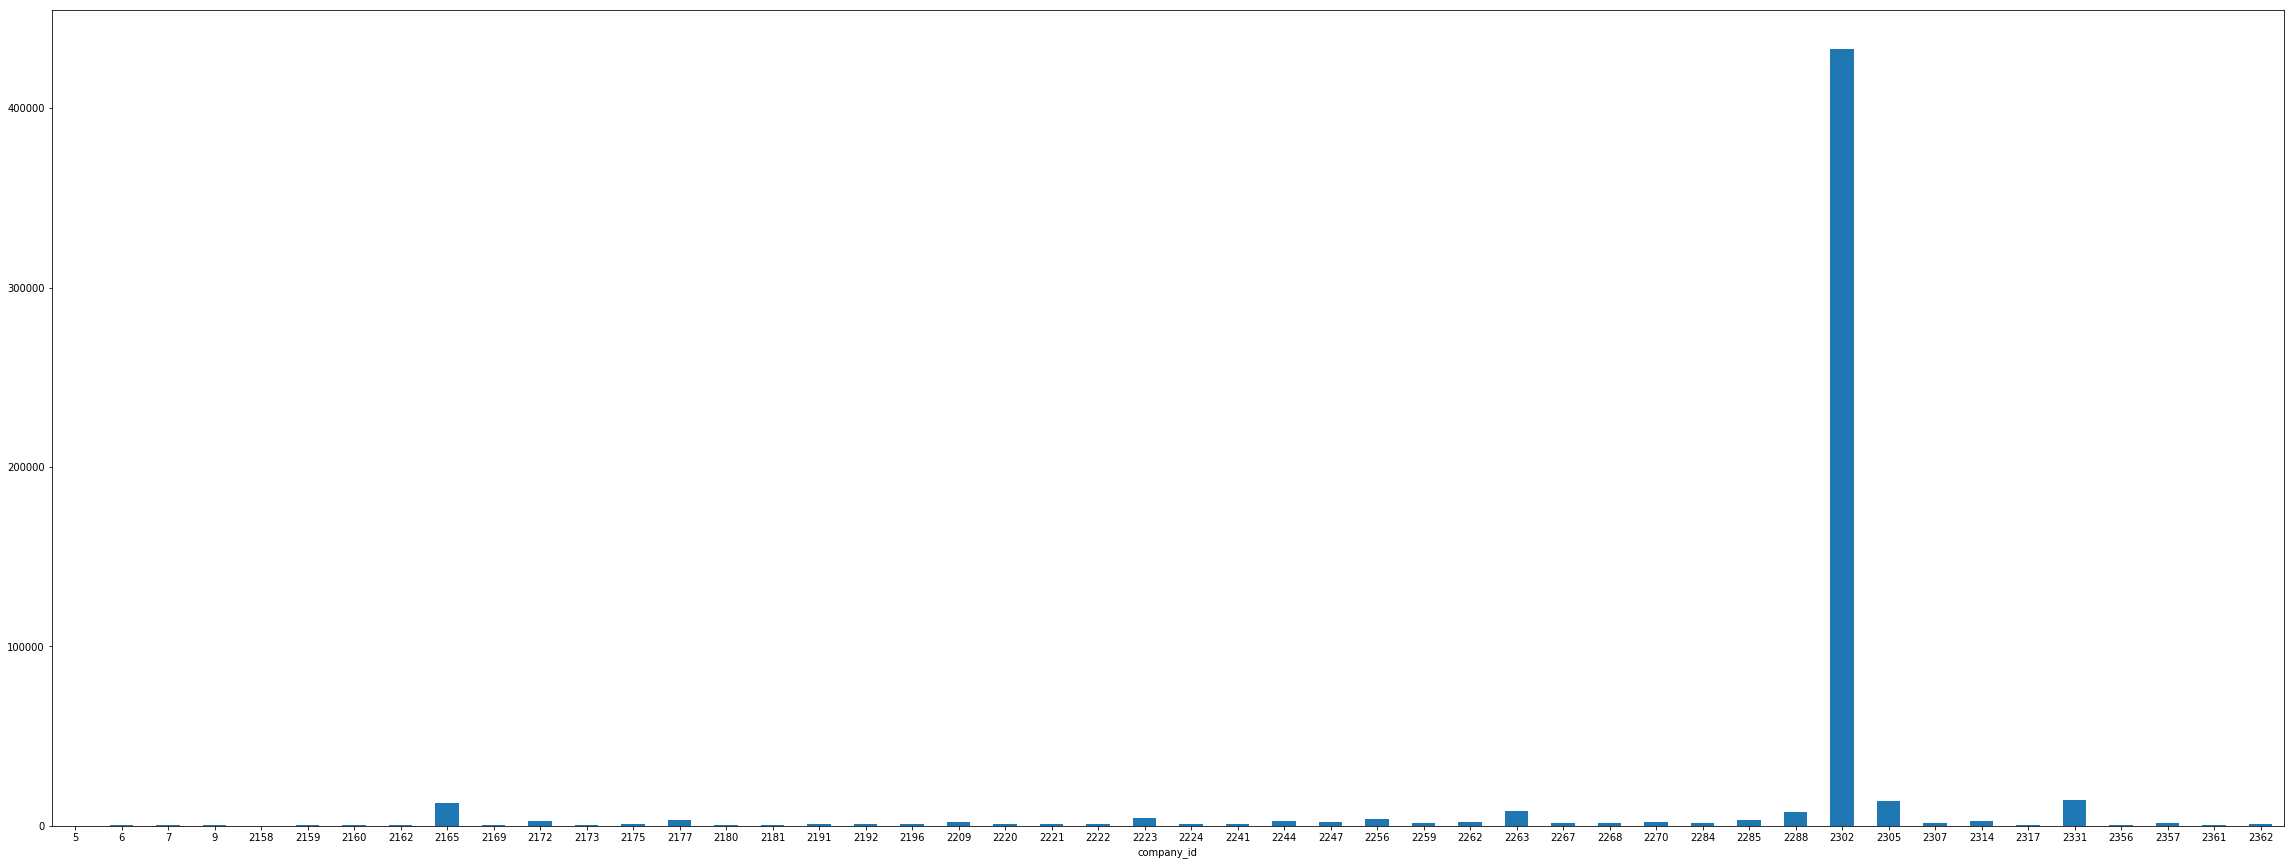

In [89]:
r_ols.resid.T.var().plot(kind="bar", rot=0)
plt.show()

In [90]:
D_ols = np.diag(r_ols.resid.T.var())
D_ols_inv = np.linalg.inv(D_ols)
indus2 = pd.DataFrame(np.linalg.inv(indus.dot(D_ols_inv).values.dot(indus.T)).dot(indus.dot(D_ols_inv)),
                      columns=indus.columns, index=indus.index)
indus2

company_id,5,6,7,9,2158,2159,2160,2162,2165,2169,...,2302,2305,2307,2314,2317,2331,2356,2357,2361,2362
auto,0.153623,0.100192,0.084093,0.050885,0.153623,0.100192,0.084093,0.050885,0.001802,0.044984,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
elec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000172,0.005419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
chem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.080265,0.044359,0.200255,0.008381,0.243293,0.088767,0.21739,0.117291


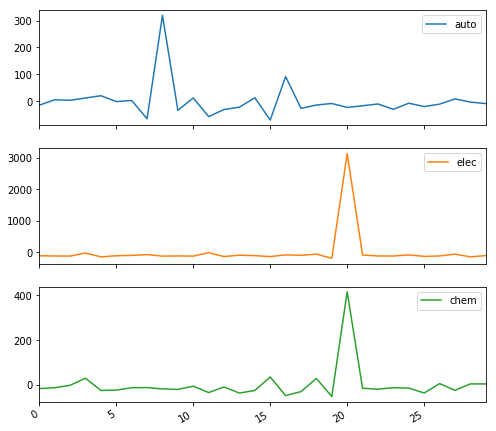

In [91]:
r_wls = sm.WLS(ret.T, indus.T, D_ols.diagonal()).fit()
factor_wls = r_wls.params.T
factor_wls.plot(subplots=True, figsize=(8, 8))
plt.show()

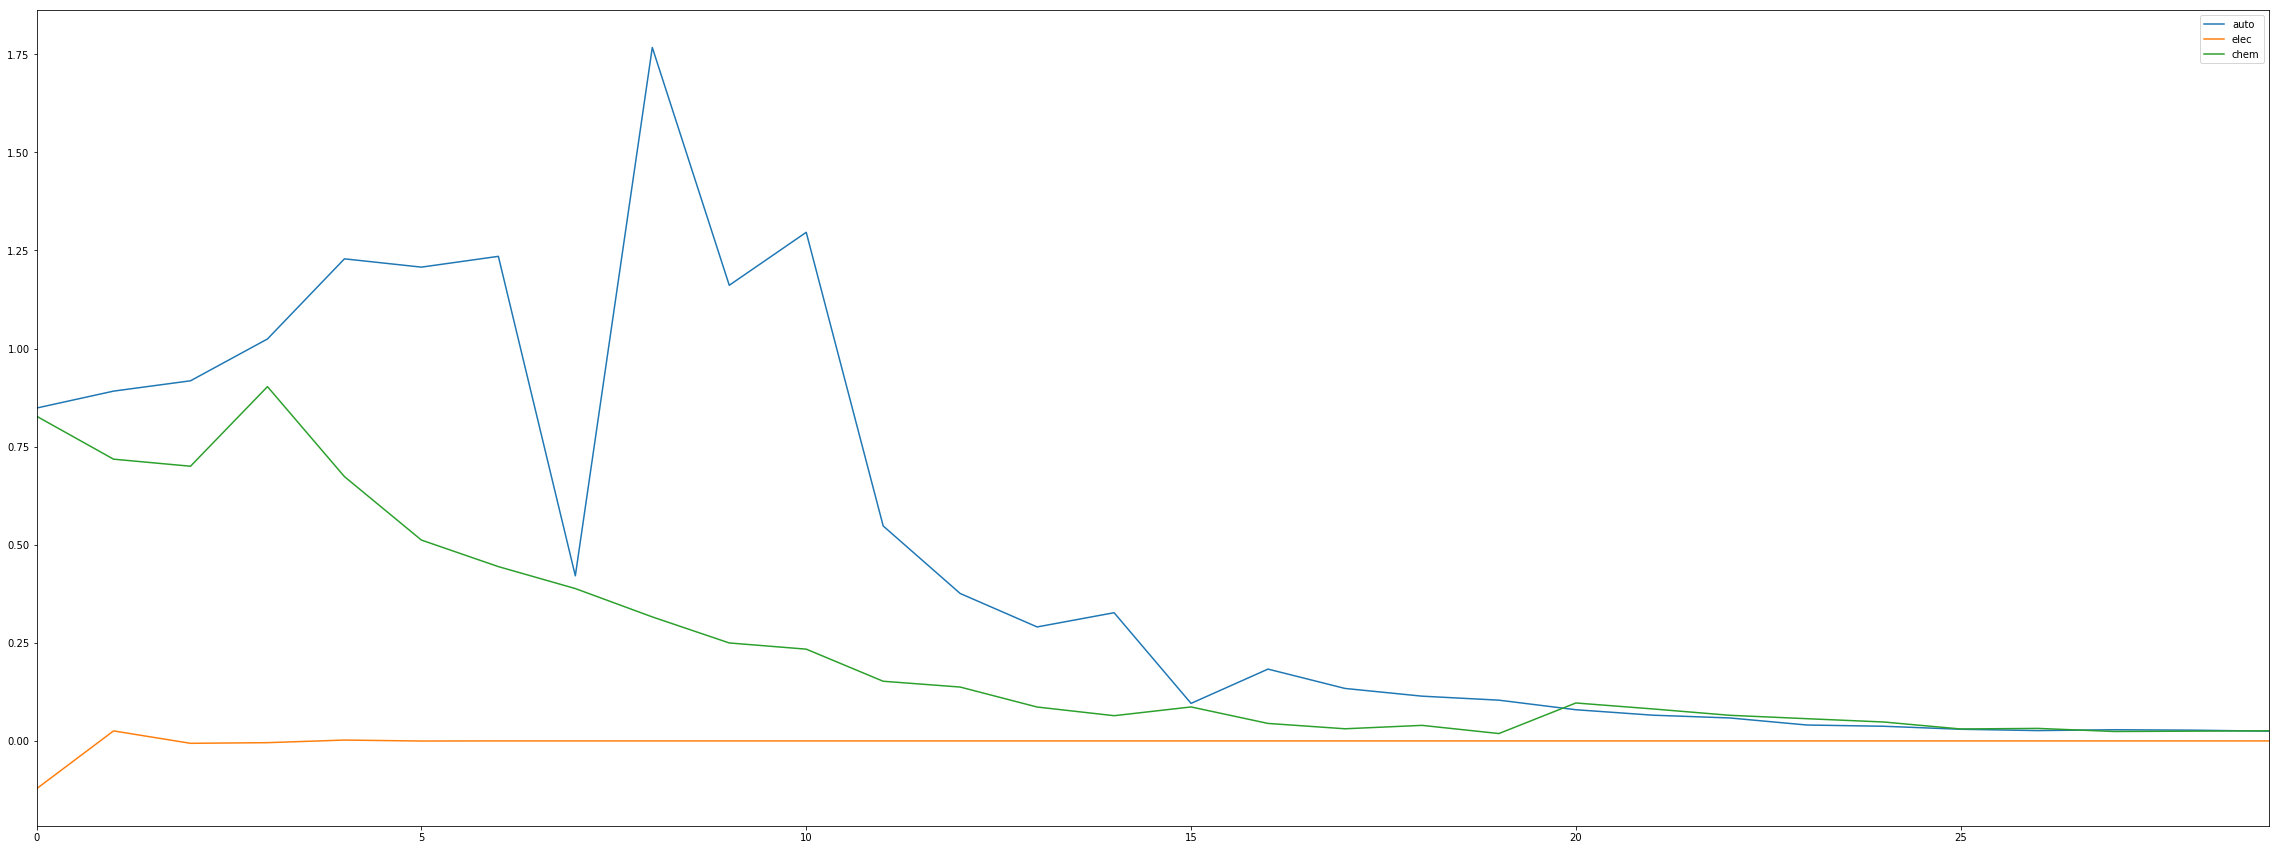

In [92]:
(1 + 0.01 * factor_wls).cumprod().plot()
plt.show()

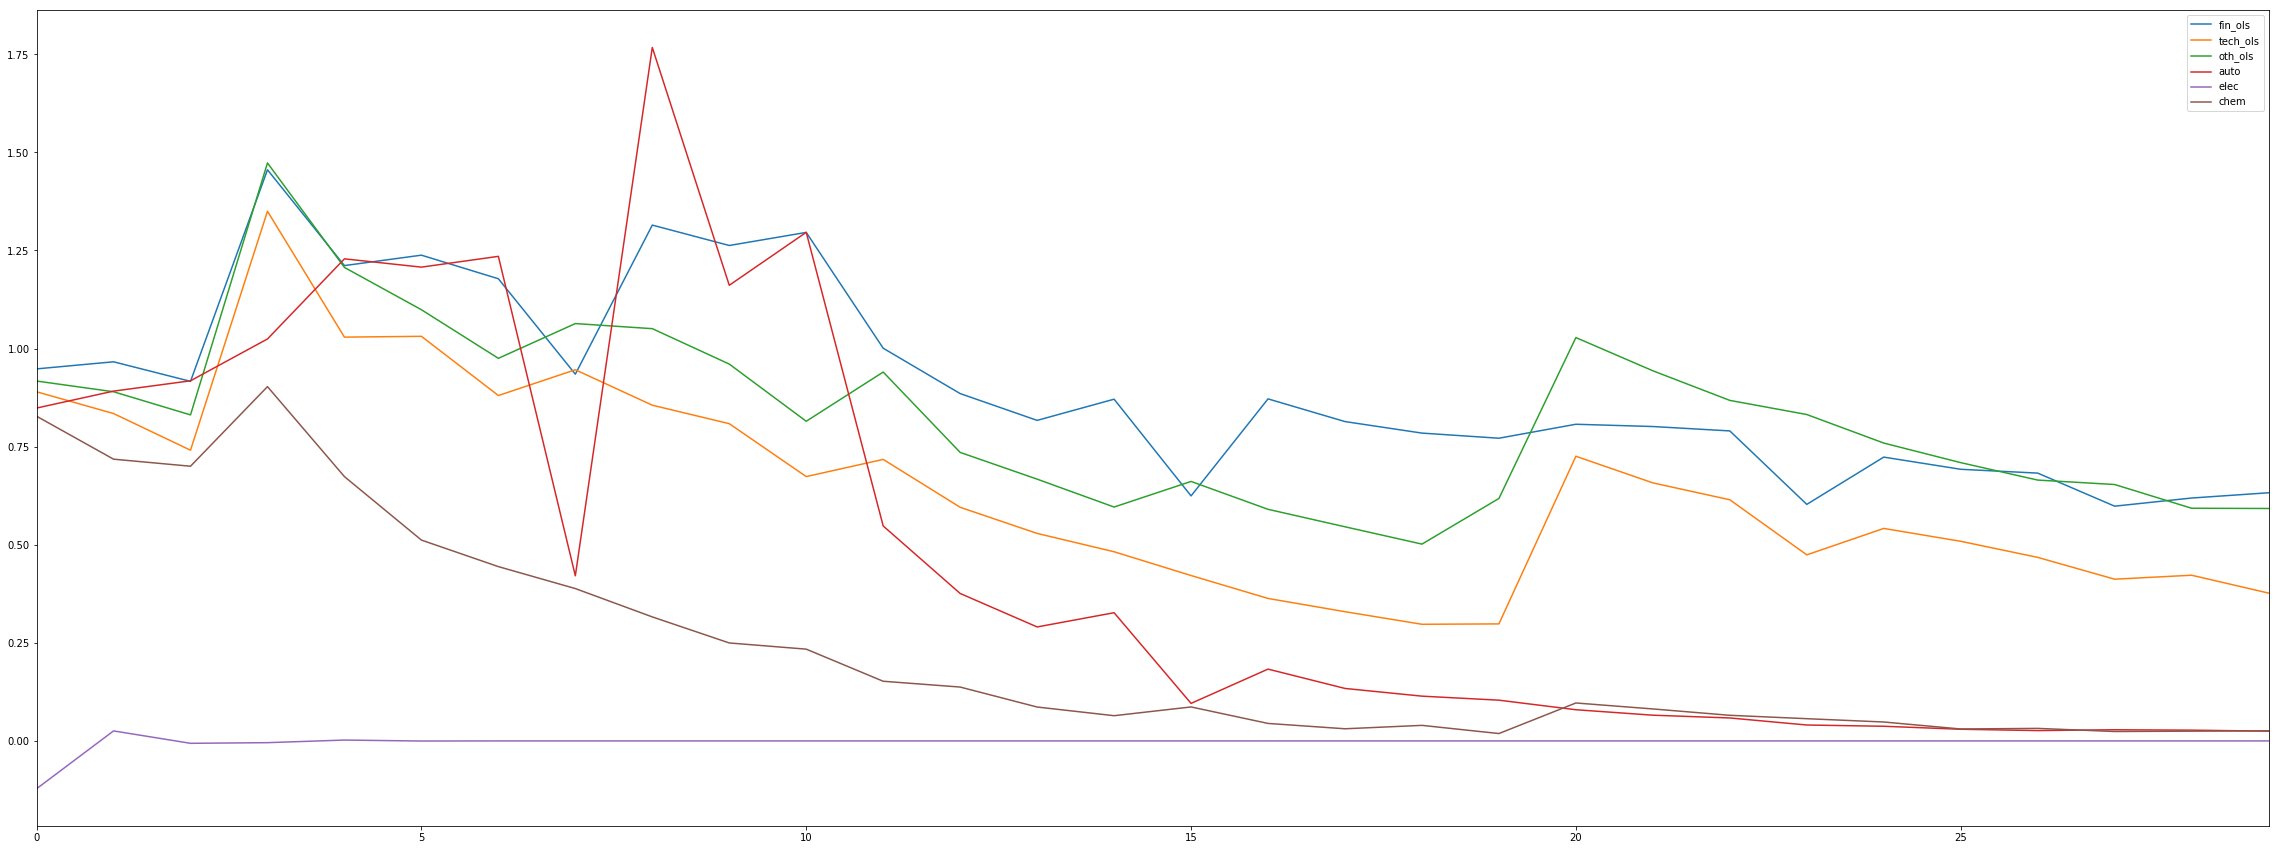

In [93]:
df1 = (1 + 0.01 * factor_ols).cumprod()
df2 = (1 + 0.01 * factor_wls).cumprod()
df1.columns = ["fin_ols", "tech_ols", "oth_ols"]
pd.concat([df1, df2], axis=1).plot()
plt.show()

/home/ktnet/Git/pandas-modules/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/ktnet/Git/pandas-modules/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/ktnet/Git/pandas-modules/venv/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
 

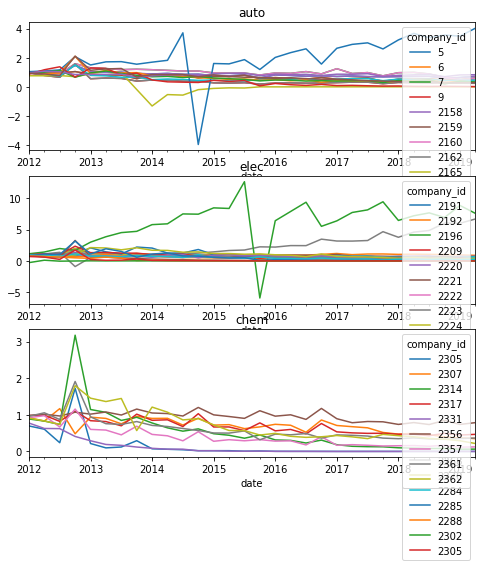

In [119]:
df4 = (1 + 0.01 * ret).cumprod()
plt.figure(figsize=(8,8))
ax1 = plt.subplot(311)
df4.ix[:, :2185].plot(ax=ax1)
plt.title("auto")
ax2 = plt.subplot(312)
df4.ix[:, 2185:2305].plot(ax=ax2)
plt.title("elec")
ax3 = plt.subplot(313)
df4.ix[:, 2305:].plot(ax=ax3)
plt.title("chem")
plt.tight_layout()
plt.show()